# Introduction

My name is Branden from Data Science Hacktiv8 Batch 05 

This is my Milestone 2 phase 2

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading Data

Load the data

In [2]:
df_full = pd.read_csv("./amazon_reviews.csv")
print(df_full.shape)
df_full.head(5)

(551159, 14)


,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5.0,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5.0,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0


# Data Cleaning

fix the price data

In [3]:
df_full.price = df_full.price.str[1:]
df_full.price = pd.to_numeric(df_full.price, errors='coerce').astype(float)

check duplicate

In [4]:
print("there are total %s of duplicate row" %(df_full.duplicated(subset=["userName", "itemName", "description", "brand", "feature", "category", "reviewTime", "reviewText"]).sum()))

there are total 41420 of duplicate row


drop duplicate

In [5]:
df_full = df_full.drop_duplicates(subset=["userName", "itemName", "description", "brand", "feature", "category", "reviewTime", "reviewText"])
df_full.shape

(509739, 14)

check nan

In [6]:
df_full.isna().sum()

userName          57
verified           0
itemName           1
description        5
image              0
brand           3139
feature            0
category           0
price          83497
rating             0
reviewTime         0
summary          228
reviewText       363
vote               0
dtype: int64

We will drop nan username and itemname and impute price and reviewText

plot the price

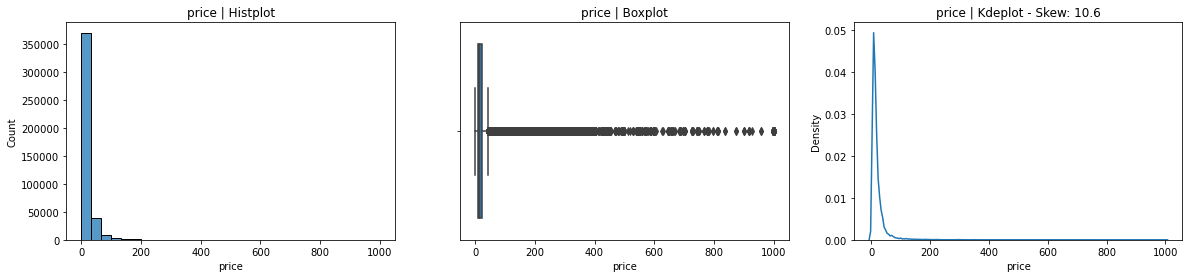

In [7]:

fig, ax = plt.subplots(1, 3, figsize=(20,4))
sns.histplot(x=df_full["price"],ax=ax[0], bins=30)
sns.boxplot(x=df_full["price"], ax=ax[1])
sns.kdeplot(df_full["price"], ax=ax[2])
skew_val=round(df_full["price"].skew(), 1)
ax[0].set_title("price" + " | Histplot")
ax[1].set_title("price" + " | Boxplot")
ax[2].set_title("price" + " | Kdeplot - Skew: "+str(skew_val))
plt.show()

we will use median to impute price and fill value for reviewText

In [8]:
from sklearn.impute import SimpleImputer

impute_price = SimpleImputer(missing_values=np.nan, strategy='median')
impute_text = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="")
# df_full["price"] = impute_price.fit_transform(df_full["price"].to_frame())
df_full["reviewText"] = impute_text.fit_transform(df_full["reviewText"].to_frame())

# EDA

In [9]:
print(df_full.iloc[3,:])

userName                                            Christinne M
verified                                                   False
itemName       Koh-I-Noor Progresso Woodless Colored 24-Penci...
description    ['Koh-I-Noor Progresso Woodless Colored 24-Pen...
image          ['https://images-na.ssl-images-amazon.com/imag...
brand                                                 KOH-I-NOOR
feature        ['Rich, pigmented, solid color encased in lacq...
category                                  Arts_Crafts_and_Sewing
price                                                      14.18
rating                                                       5.0
reviewTime                                            2018-01-01
summary                                                 Loving!!
reviewText     I LOVE THEM!! I bought them at Micheals our of...
vote                                                           0
Name: 3, dtype: object


Here we can see the information of one customer

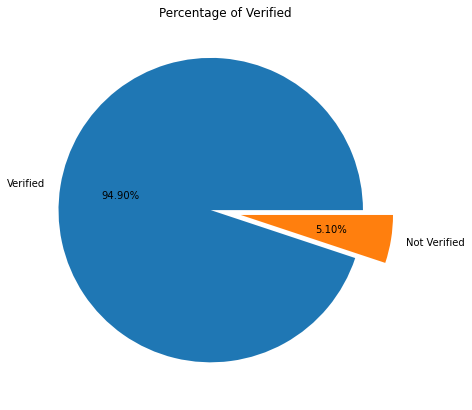

In [10]:
labels = ["Verified", "Not Verified"]
exploded = [0.1,0.1]
plt.figure(figsize = (9,7), facecolor="w")
plt.title('Percentage of Verified')
plt.pie(df_full.verified.value_counts() , autopct = "%.2f%%", labels= labels, explode = exploded, startangle=0, shadow = False)
plt.show()

There are almost 5% total customer that are not verified

make the dataframe for the category pie

In [11]:
pd_pie = pd.DataFrame(df_full['category'].value_counts())
pd_pie["category"] = pd_pie["category"]/df_full.shape[0] * 100
df_others_index = pd_pie[pd_pie['category'] < 2].index
pd_pie.index = np.where(pd_pie['category'] < 2, "others", pd_pie.index)
pd_pie = pd_pie.groupby(pd_pie.index).sum()
pd_pie = pd_pie.sort_values(by="category", ascending=False)

Others category

In [12]:
print("Category under others label: ", end="")
print(", ".join(df_others_index.values))

Category under others label: Industrial_and_Scientific, Luxury_Beauty, All_Beauty, Software, AMAZON_FASHION, Digital_Music, Appliances


plot the pie

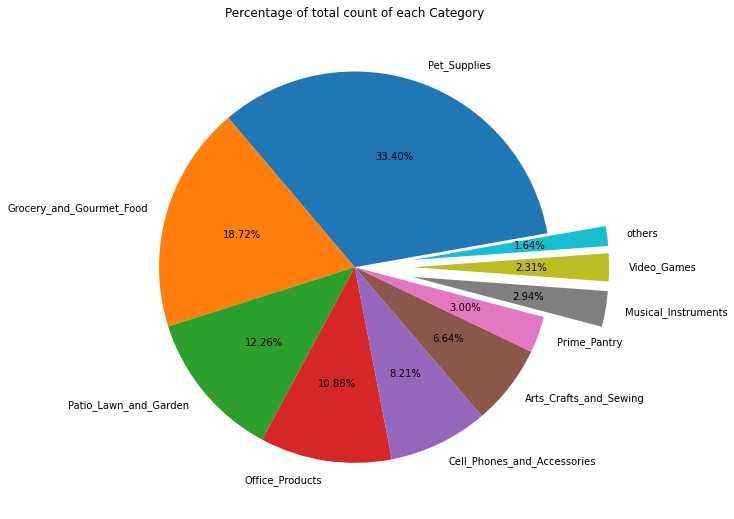

In [13]:
exploded = np.zeros(len(pd_pie.index))
exploded[-3:] = 0.3
labels = pd_pie.index

plt.figure(figsize = (10,9), facecolor="w")
plt.title('Percentage of total count of each Category')
plt.pie(pd_pie.category , autopct = "%.2f%%", labels=labels, explode = exploded, startangle=10)
plt.show()

This is the percentage of bought item

Rating by category

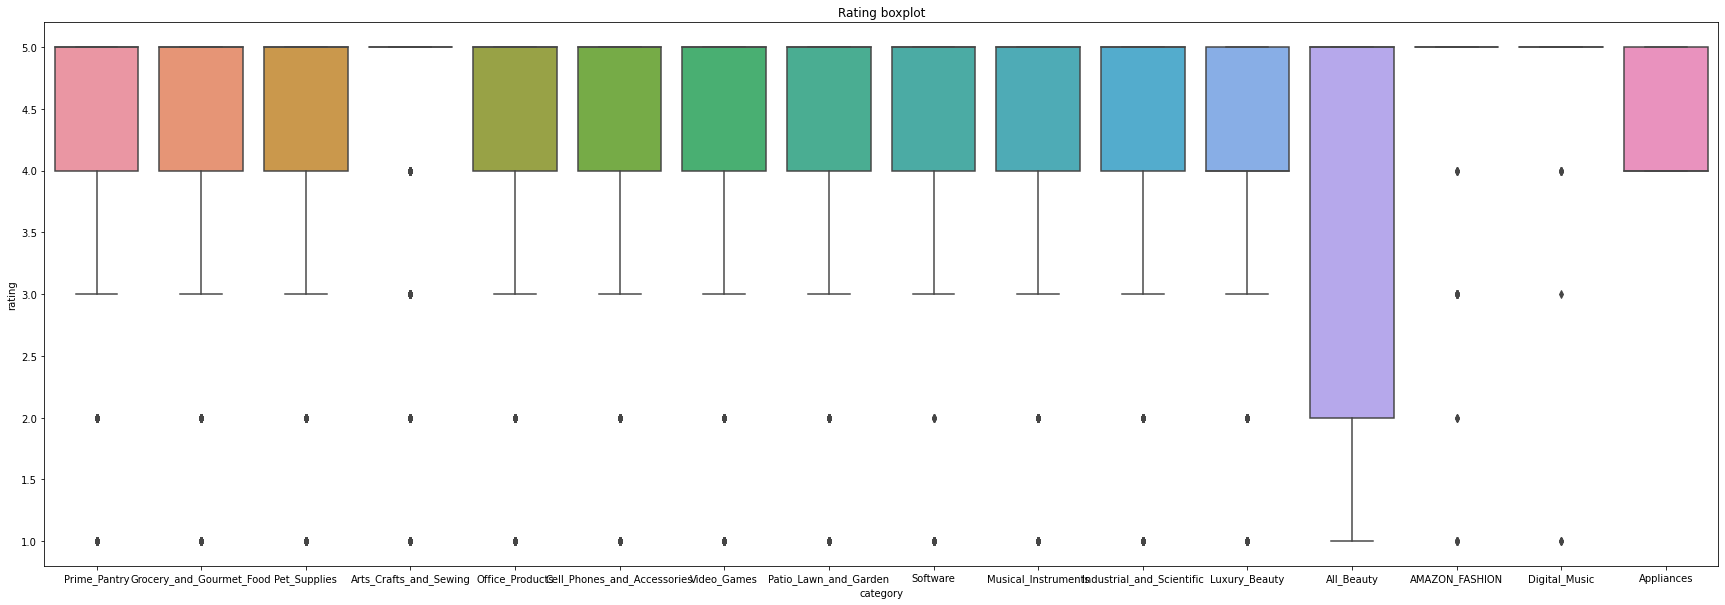

In [14]:
plt.figure(figsize = (30,10), facecolor="w")
sns.boxplot(data=df_full, x="category", y="rating")
plt.title('Rating boxplot')
plt.show()

- it seems people like to rate the product between 4 to 5
- Art crafts and sewing has highest mean rate despite the total sold item (or it's own data) not that small.
- All Beauty, Amazon Fashion, Digital Music and Applances have smallest that's why their boxplot is different

Total brand

In [15]:
print("There are %s total of brand product" % (df_full.brand.nunique()))

There are 24641 total of brand product


Total price by category

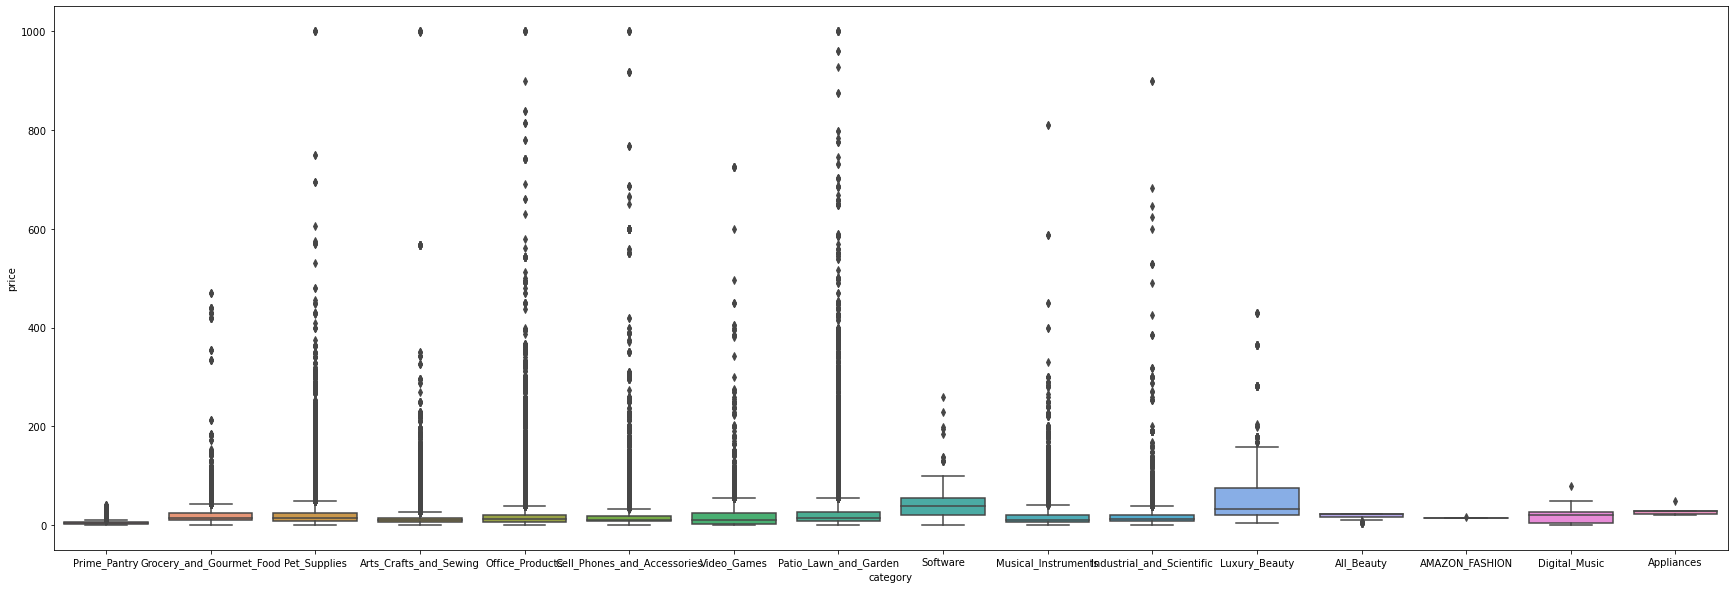

In [16]:
plt.figure(figsize = (30,10), facecolor="w")
sns.boxplot(data=df_full, x="category", y="price")
plt.show()

since they are natural outlier, let's just filter it for the sake of eda only

This is the barplot of category product with price range 0~100 and we are going to combine all low total number of category product to make it fair

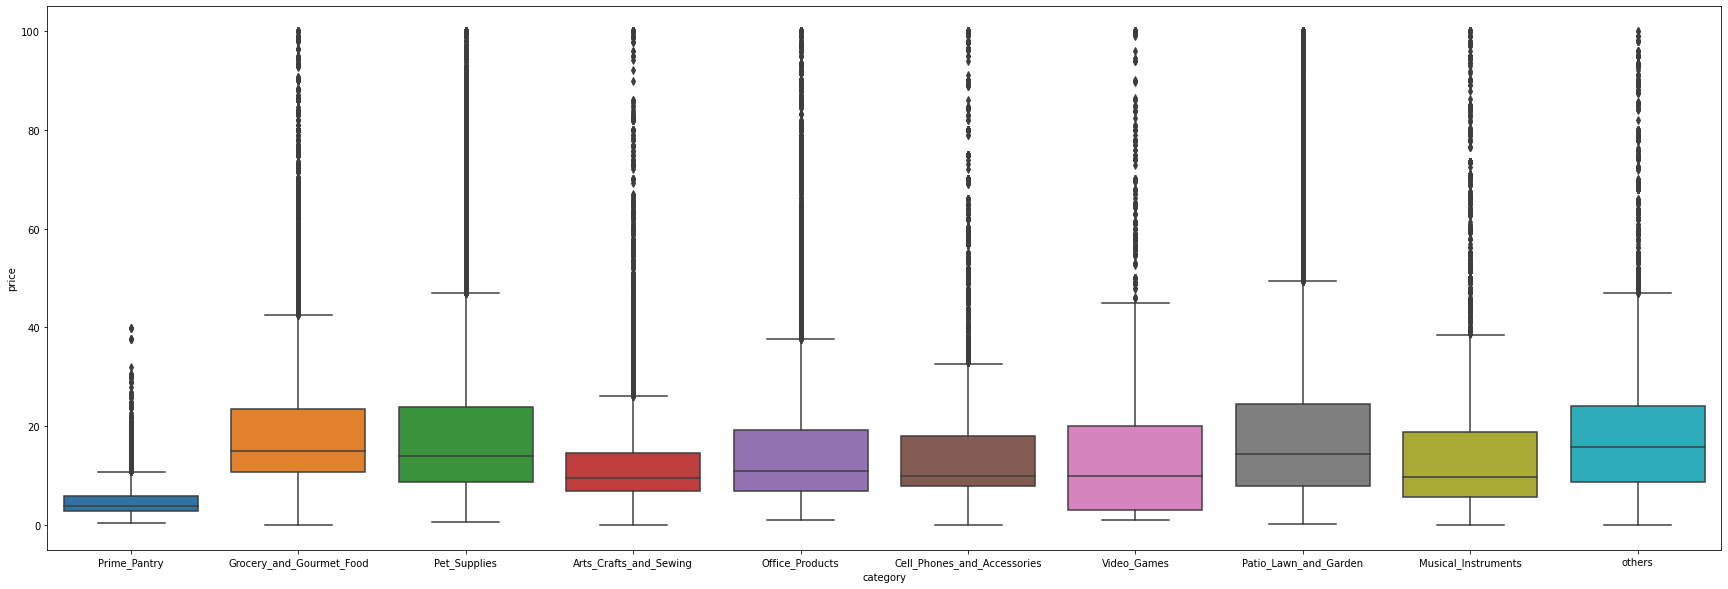

In [17]:
df_price = df_full[df_full.price < 100].copy()
df_price["category"] = np.where(df_price.category.isin(list(df_others_index.values)), "others", df_price.category)
plt.figure(figsize = (30,10), facecolor="w")
sns.boxplot(data=df_price, x="category", y="price")
plt.show()

- Most of them seems to be in the same mean price range which is under $20
- Prime Pantry has the lowest mean price range

In [18]:
pd_pie = pd.DataFrame(df_full['category'].value_counts())
pd_pie["category"] = pd_pie["category"]/df_full.shape[0] * 100
df_others_index = pd_pie[pd_pie['category'] < 2].index
pd_pie.index = np.where(pd_pie['category'] < 2, "others", pd_pie.index)
pd_pie = pd_pie.groupby(pd_pie.index).sum()
pd_pie = pd_pie.sort_values(by="category", ascending=False)

In [19]:
df_category = df_full.groupby("category").sum()
df_category = df_category.sort_values(by=["vote"], ascending=False)
df_category.index = np.where(df_category.vote < df_category.vote[8], "others", df_category.index)
df_category = df_category.groupby(df_category.index).sum()
df_category = df_category.sort_values(by=["vote"], ascending=False)
df_category

,verified,price,rating,vote
Pet_Supplies,163166,3142490.30,724032.0,18775
Grocery_and_Gourmet_Food,88422,1384915.35,418968.0,11882
Patio_Lawn_and_Garden,60419,1469998.55,268795.0,11464
Office_Products,53472,1005397.87,248308.0,4949
Cell_Phones_and_Accessories,39444,617999.35,177260.0,4568
Arts_Crafts_and_Sewing,33060,448693.85,153526.0,3617
Video_Games,10825,73569.03,50947.0,2247
others,20259,285445.87,103973.0,1777
Musical_Instruments,14389,265388.54,66485.0,1209
All_Beauty,294,1410.67,1361.0,974


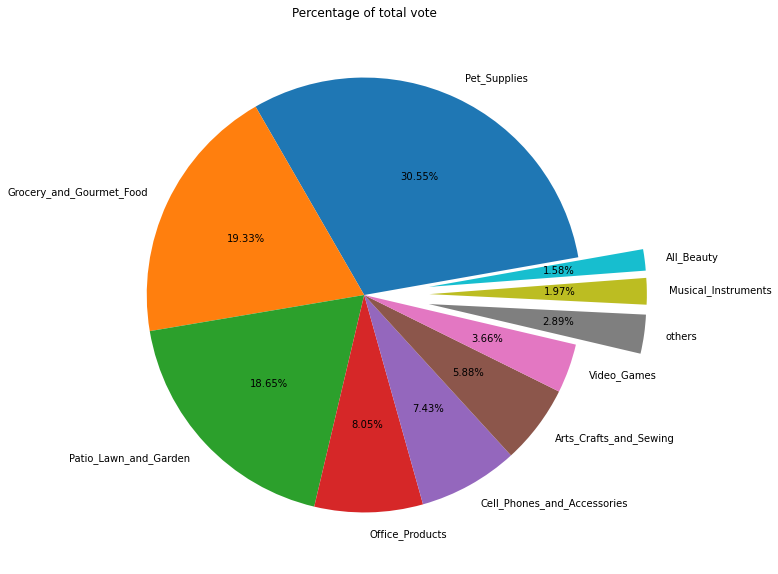

In [20]:
exploded = np.zeros(len(df_category.index))
exploded[-3:] = 0.3
labels = df_category.index

plt.figure(figsize = (11,10), facecolor="w")
plt.title('Percentage of total vote')
plt.pie(df_category.vote , autopct = "%.2f%%", labels=labels, explode = exploded, startangle=10)
plt.show()

Pet supplies has the highest vote

In [21]:
df_category = df_full.groupby("category").sum()
df_category = df_category.sort_values(by=["price"], ascending=False)
df_category.index = np.where(df_category.price < df_category.price[8], "others", df_category.index)
df_category = df_category.groupby(df_category.index).sum()
df_category = df_category.sort_values(by=["price"], ascending=False)
df_category

,verified,price,rating,vote
Pet_Supplies,163166,3142490.30,724032.0,18775
Patio_Lawn_and_Garden,60419,1469998.55,268795.0,11464
Grocery_and_Gourmet_Food,88422,1384915.35,418968.0,11882
Office_Products,53472,1005397.87,248308.0,4949
Cell_Phones_and_Accessories,39444,617999.35,177260.0,4568
Arts_Crafts_and_Sewing,33060,448693.85,153526.0,3617
Musical_Instruments,14389,265388.54,66485.0,1209
others,25302,152713.91,123150.0,3939
Industrial_and_Scientific,5546,111077.07,25806.0,728
Luxury_Beauty,530,96634.59,7325.0,331


In [22]:
int(df_category.price.max())

3142490

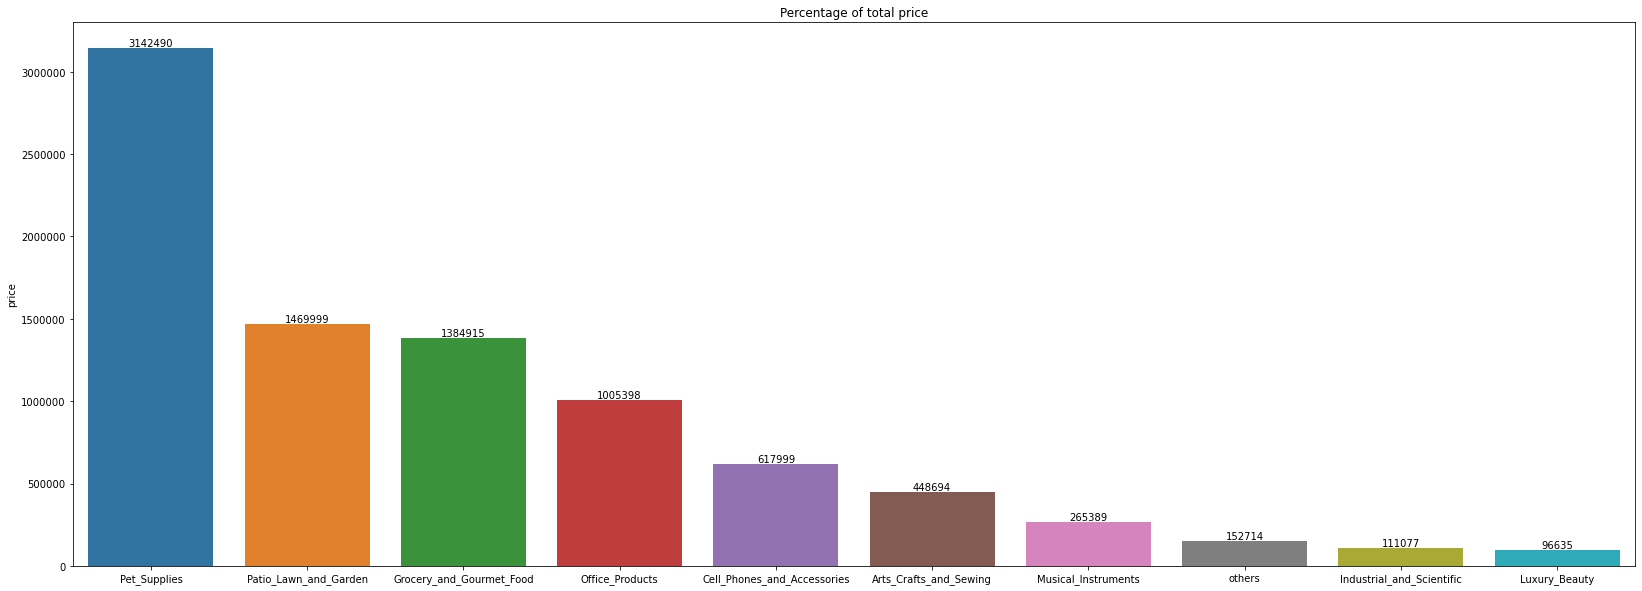

In [23]:
plt.figure(figsize = (28,10), facecolor="w")
plt.title('Percentage of total price')
ax=sns.barplot(data=df_category, x=df_category.index, y="price", dodge=True)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Pet supplies has the highest total price

# Eda Analysis

- Customer popular item is pet supplies
- there are less than 5% not verified customer
- Art crafts and sewing is the highest mean rate category product
- Most of the product seems to be in the same mean price range which is under $20
- Pet supplies is the most popular product

# Preprocessing

Now we need to generate id from userName and itemName

In [24]:
from sklearn.preprocessing import LabelEncoder

userName_encoder = LabelEncoder().fit(df_full.userName)
itemName_encoder = LabelEncoder().fit(df_full.itemName)
reviewText_encoder = LabelEncoder().fit(df_full.reviewText)


df_full["user_id"] = userName_encoder.transform(df_full.userName)
df_full["item_id"] = itemName_encoder.transform(df_full.itemName)

Since we just want it to be in id from the start, it doesn't need to be after train test split

save image according to itemname unique

In [25]:
# img_encoder = pd.DataFrame(itemName_encoder.classes_, columns=["itemName"])
img_encoder = df_full[df_full.duplicated(subset=['itemName']) == False][["image", "itemName"]]

train test val split

In [26]:
from sklearn.model_selection import train_test_split

random_state = 42
train, test = train_test_split(df_full, test_size=0.3, random_state=random_state)
test, val = train_test_split(test, test_size=0.65, random_state=random_state)

dim_items=df_full.item_id.nunique()+1
dim_users=df_full.user_id.nunique()+1

define the dataset tensor conversion function

In [27]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
def make_ds(features, labels):
    user_id = tf.convert_to_tensor(features["user_id"])
    item_id = tf.convert_to_tensor(features["item_id"])
    tensor = tf.data.Dataset.from_tensor_slices(({'user_input':user_id, 
                                                'item_input':item_id, }, labels))
    return tensor.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

then we convert our data to tensor dataset for our tf model

In [28]:
y_train=(train.rating - df_full.rating.min()) / (df_full.rating.max() - df_full.rating.min())
y_val=(val.rating - df_full.rating.min()) / (df_full.rating.max() - df_full.rating.min())
y_test=(test.rating - df_full.rating.min()) / (df_full.rating.max() - df_full.rating.min())

data_cols = ["user_id", "item_id"]
train1 = make_ds(train[data_cols], y_train)
val1 = make_ds(val[data_cols], y_val)  
test1 = make_ds(test[data_cols], y_test) 

# Modeling

We make the basic recommender system model

In [37]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.models import Model

item_input = Input(shape=(1,), name="item_input")
item_embedding = Embedding(dim_items, 25, embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6), name="Item-Embedding")(item_input)
item_vec = Flatten(name="Flatten-Books")(item_embedding)

user_input = Input(shape=(1,), name="user_input")
user_embedding = Embedding(dim_users, 25, embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6), name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([item_vec, user_vec])

output = Dense(1,activation='relu')(prod)

model = Model([user_input, item_input], output)
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Item-Embedding (Embedding)     (None, 1, 25)        2725275     ['item_input[0][0]']             
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 25)        3279625     ['user_input[0][0]']             
                                                                                              

Plot the model

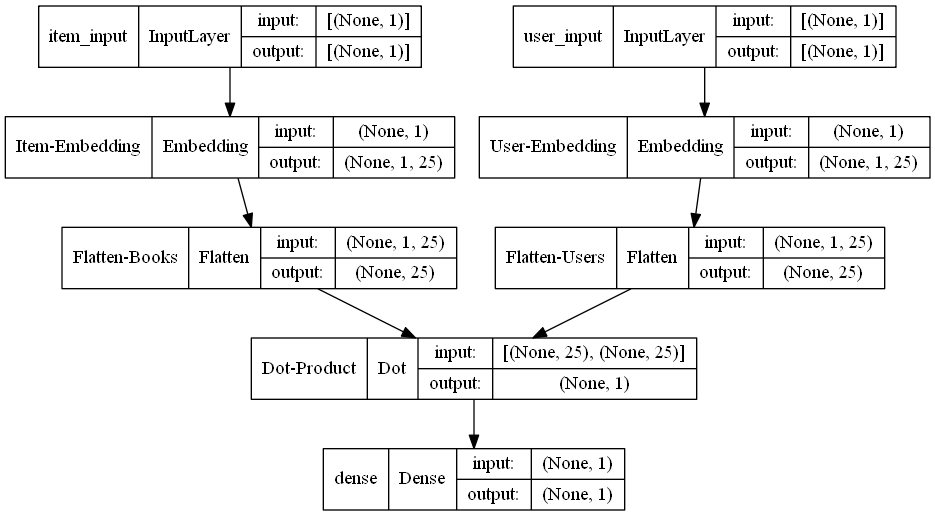

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

We are gonna use GPU for the training, so we need to set it first

In [39]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=6024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Virtual devices cannot be modified after being initialized


Training

In [40]:
tf.keras.backend.clear_session()
history = model.fit(train1, 
                    epochs=5, 
                    verbose=1, 
                    validation_data=val1)

Epoch 1/5
5576/5576 [==============================] - 32s 6ms/step - loss: 0.1285 - val_loss: 0.0861
Epoch 2/5
5576/5576 [==============================] - 33s 6ms/step - loss: 0.0828 - val_loss: 0.0885
Epoch 3/5
5576/5576 [==============================] - 33s 6ms/step - loss: 0.0657 - val_loss: 0.0971
Epoch 4/5
5576/5576 [==============================] - 32s 6ms/step - loss: 0.0448 - val_loss: 0.1019
Epoch 5/5
5576/5576 [==============================] - 32s 6ms/step - loss: 0.0382 - val_loss: 0.1026


# Model Evaluation

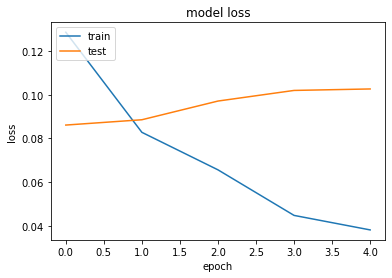

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

RMSE score with test dataset

In [42]:
from sklearn.metrics import mean_squared_error
history = model.predict(test1)
rmse = mean_squared_error(y_true=test.rating , y_pred=history, squared=False)
print(f"RMSE Score: {rmse}")

RMSE Score: 3.7054385972374324


Recommendation prediction to user X

In [43]:
import numpy as np
num_items= 100
user = 1213
item_list = df_full.item_id.sample(num_items).values
user_1 = np.array([user for i in range(len(item_list))])

pred = model.predict([user_1,item_list]).reshape(num_items)

top_5_ids = (-pred).argsort()[:5] # index of item id
top_5_books_id = item_list[top_5_ids] 
top_5_books_rating = pred[top_5_ids]*(df_full.rating.max() - df_full.rating.min()) + df_full.rating.min()

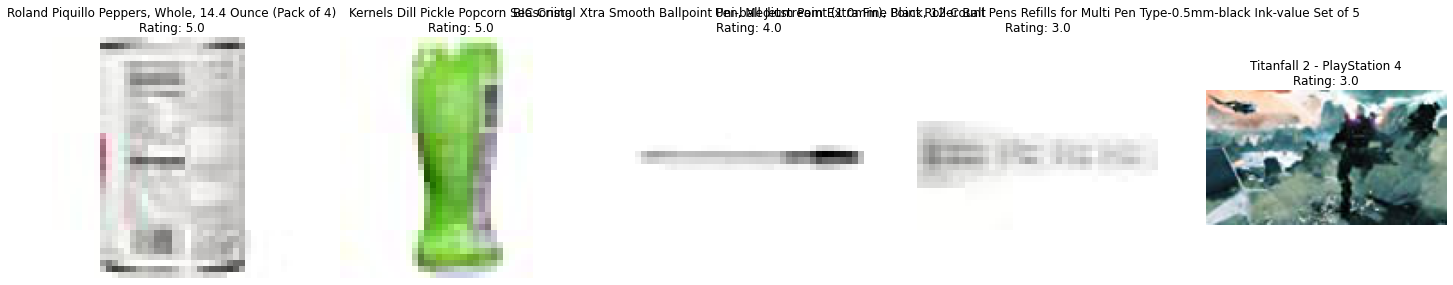

In [44]:
from PIL import Image
import urllib
from IPython.display import display, HTML

display(HTML('<h2>User X favorite item:</h2>'))

liked_books_user_1 = df_full[df_full.user_id==user].sort_values('rating',ascending=False).item_id[:5].values 
user_rating = df_full[df_full.user_id==user].sort_values('rating',ascending=False).rating[:5].values
fig1,ax1=plt.subplots(ncols=5,figsize=(25,5))
for i,id in enumerate(liked_books_user_1):
  id = df_full[df_full.item_id==id].index[0]
  a=Image.open(urllib.request.urlopen(df_full['image'].loc[id][2:-2].split("', '")[0]))
  ax1[i].imshow(a)
  ax1[i].set_title('{}\nRating: {}'.format(df_full['itemName'].loc[id],user_rating[i]))
  ax1[i].axis('off')

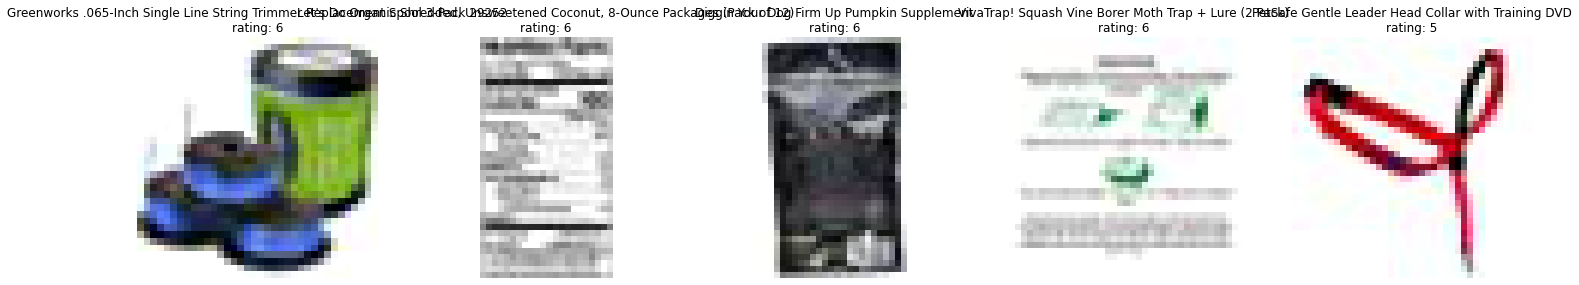

In [45]:
display(HTML('<h2>Reccomended item to user X:</h2>'))
fig2,ax2=plt.subplots(ncols=5,figsize=(25,5))
for i,id in enumerate(top_5_books_id):
  id = df_full[df_full.item_id==id].index[0]
  if(df_full['image'].loc[id] != "[]"):
    link = df_full['image'].loc[id][2:-2].split("', '")[0]
    ax2[i].imshow(Image.open(urllib.request.urlopen(link)))
  ax2[i].set_title('{}\nrating: {:.0f}'.format(df_full['itemName'].loc[id],top_5_books_rating[i]))
  ax2[i].axis('off')

# Model Optimization

we are gonna add reviewText as our other feature

Vectorize Text data

In [46]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 4000
max_length = round(sum([len(i.split()) for i in train.reviewText.values])/len(train.reviewText.values)) + 1

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [47]:
text_vectorization.adapt(train.reviewText)

Layer embedding

In [48]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

define the dataset tensor conversion function

In [49]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
def make_ds(features, labels):
    reviewText = tf.convert_to_tensor(features["reviewText"], dtype=tf.string)
    user_id = tf.convert_to_tensor(features["user_id"])
    item_id = tf.convert_to_tensor(features["item_id"])
    tensor = tf.data.Dataset.from_tensor_slices(({'user_input':user_id, 
                                                'item_input':item_id, 
                                                'text_input':reviewText}, labels))
    return tensor.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

then we convert our data to tensor dataset for our tf model

In [145]:
y_train=(train.rating - df_full.rating.min()) / (df_full.rating.max() - df_full.rating.min())
y_val=(val.rating - df_full.rating.min()) / (df_full.rating.max() - df_full.rating.min())
y_test=(test.rating - df_full.rating.min()) / (df_full.rating.max() - df_full.rating.min())

data_cols = ["user_id", "item_id", "reviewText"]
train2 = make_ds(train[data_cols], y_train)
val2 = make_ds(val[data_cols], y_val)  
test2 = make_ds(test[data_cols], y_test) 

we create our improved model

In [150]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, concatenate, LSTM, BatchNormalization, Activation, Dropout
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


item_input = Input(shape=(1,), name="item_input")
item_embedding = Embedding(dim_items, 50, embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6), name="Item-Embedding")(item_input)
item_vec = Flatten(name="Flatten-Books")(item_embedding)

user_input = Input(shape=(1,), name="user_input")
user_embedding = Embedding(dim_users, 50, embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6), name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([item_vec, user_vec])

text_input = layers.Input(shape=(), dtype='string', name='text_input') 
text_vec = text_vectorization(text_input)
embed = embedding(text_vec)
lstm1 = LSTM(64, return_sequences=True, name='lstm1',)(embed)
lstm2 = LSTM(64, name='lstm2')(lstm1)
dense1 = Dense(16, activation='relu', name='dense1')(lstm2)
review_outputs = Dense(3, activation='sigmoid', name='review_output')(dense1)

concat = concatenate([prod, review_outputs])
dense2 = Dense(8,activation='relu', name='dense2')(concat)
dense2 = Dropout(0.25)(dense2)
output = Dense(1,activation='relu', name='output')(dense2)

model2 = Model([user_input, item_input, text_input], output)

optimizer = Adam(0.001)
model2.compile(loss='mean_squared_error',optimizer=optimizer)

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 33)          0           ['text_input[0][0]']             
 ization)                                                                                         
                                                                                                  
 embedding (Embedding)          (None, 33, 128)      512000      ['text_vectorization[10][0]']    
                                                                                                  
 item_input (InputLayer)        [(None, 1)]          0           []                           

plot the whole model

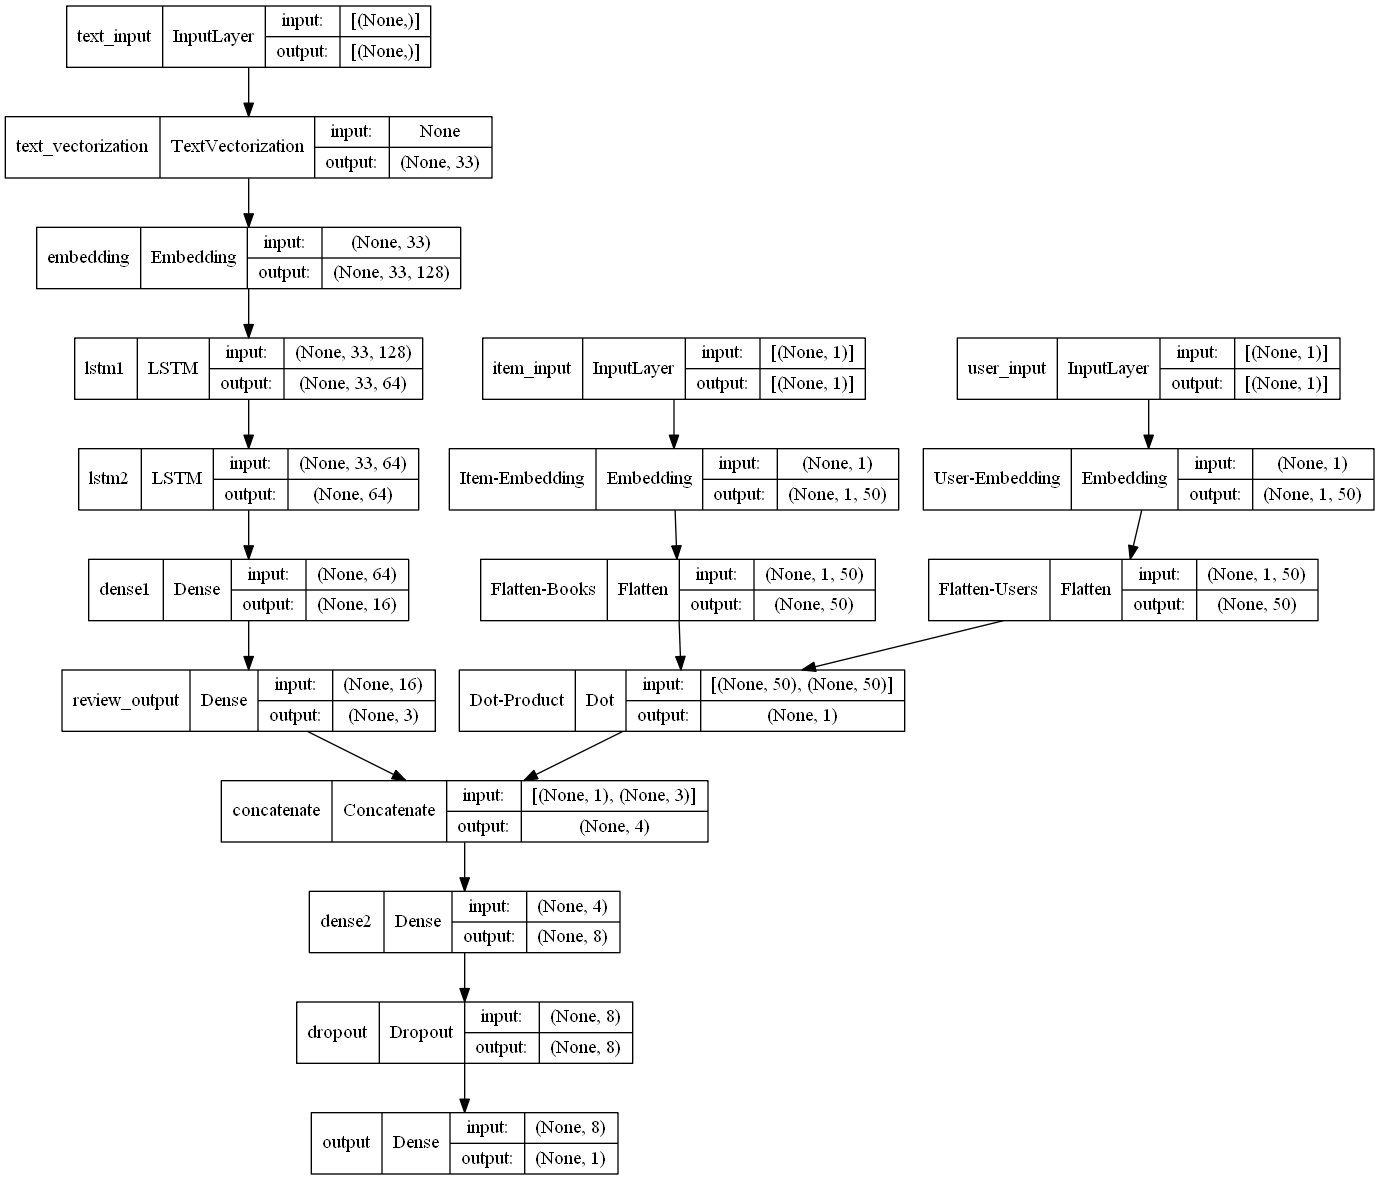

In [151]:
tf.keras.utils.plot_model(model2, show_shapes=True)

define the callbacks

In [152]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import absl.logging

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, cooldown=0,
                              patience=1, min_lr=0.00001)

Train the model

In [153]:
tf.keras.backend.clear_session()
history = model2.fit(train2,
                    epochs=10, 
                    verbose=1, 
                    callbacks=[reduce_lr],
                    validation_data=val2)

Epoch 1/10
5576/5576 [==============================] - 102s 18ms/step - loss: 0.0565 - val_loss: 0.0424 - lr: 0.0010
Epoch 2/10
5576/5576 [==============================] - 98s 18ms/step - loss: 0.0456 - val_loss: 0.0414 - lr: 0.0010
Epoch 3/10
5576/5576 [==============================] - 99s 18ms/step - loss: 0.0447 - val_loss: 0.0415 - lr: 0.0010
Epoch 4/10
5576/5576 [==============================] - 99s 18ms/step - loss: 0.0442 - val_loss: 0.0402 - lr: 1.0000e-04
Epoch 5/10
5576/5576 [==============================] - 98s 18ms/step - loss: 0.0433 - val_loss: 0.0402 - lr: 1.0000e-04
Epoch 6/10
5576/5576 [==============================] - 98s 18ms/step - loss: 0.0430 - val_loss: 0.0400 - lr: 1.0000e-05
Epoch 7/10
5576/5576 [==============================] - 99s 18ms/step - loss: 0.0428 - val_loss: 0.0400 - lr: 1.0000e-05
Epoch 8/10
5576/5576 [==============================] - 98s 18ms/step - loss: 0.0428 - val_loss: 0.0400 - lr: 1.0000e-05
Epoch 9/10
5576/5576 [=====================

# Model Evaluation

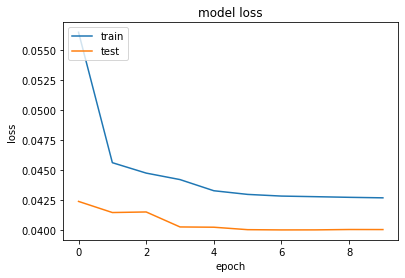

In [154]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

RMSE score with test dataset

In [155]:
from sklearn.metrics import mean_squared_error
y_pred = model2.predict(test2)
rmse = mean_squared_error(y_true=test.rating , y_pred=y_pred, squared=False)
print(f"RMSE Score: {rmse}")

RMSE Score: 3.696394704950264


Recommendation prediction to user X

In [228]:
num_items= 100
user = 1217
item_list = df_full.item_id.sample(num_items).values
user_1 = np.array([user for i in range(len(item_list))])
reviewText_user = df_full["reviewText"][user_1]

pred = model2.predict([user_1,item_list,reviewText_user]).reshape(num_items)

top_5_ids = (-pred).argsort()[:5]
top_5_books_id = item_list[top_5_ids]
top_5_books_rating = pred[top_5_ids]*(df_full.rating.max() - df_full.rating.min()) + df_full.rating.min()

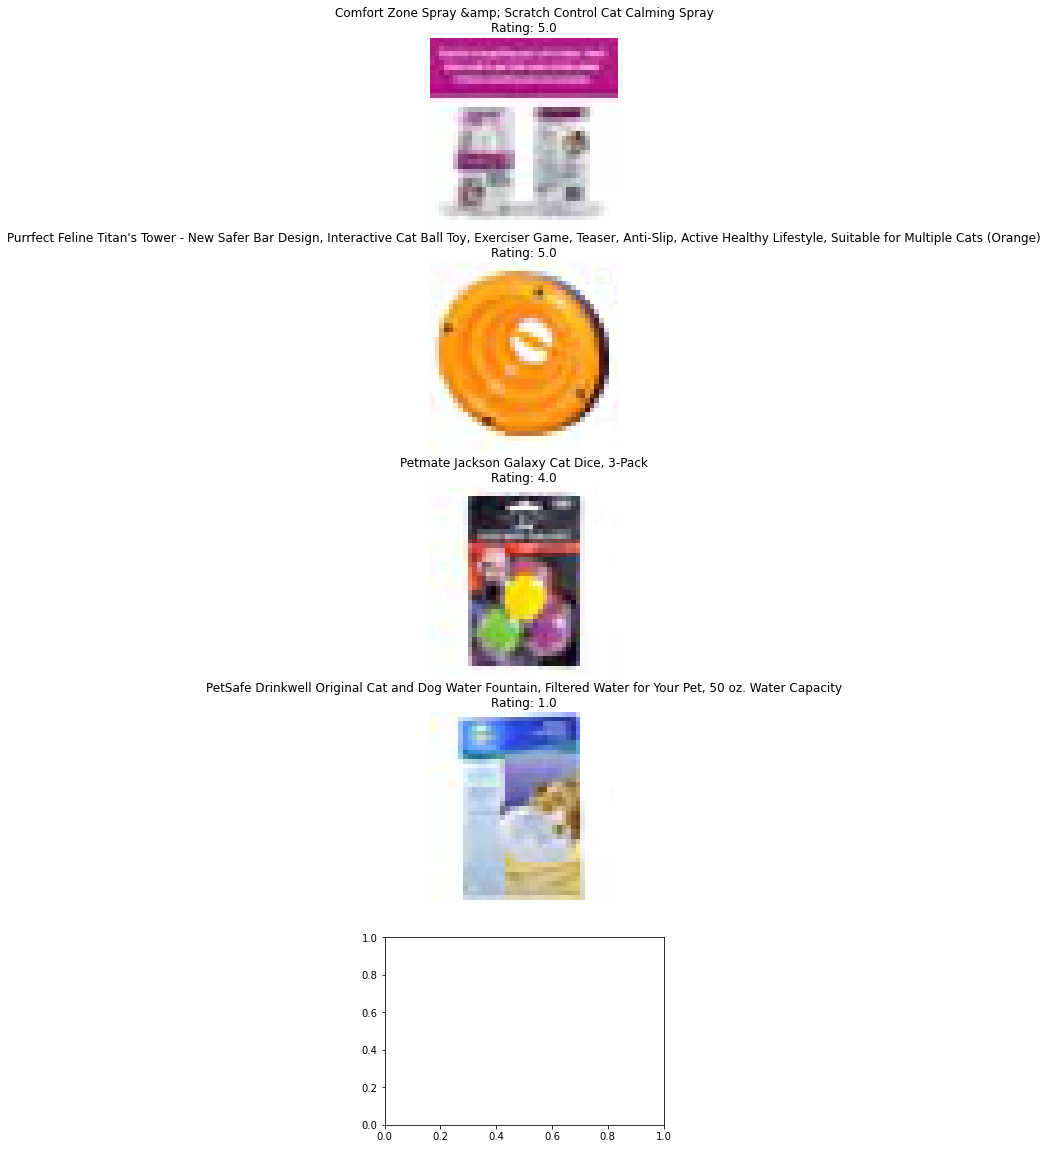

In [229]:
from PIL import Image
import urllib
from IPython.display import display, HTML

display(HTML('<h2>User X favorite item:</h2>'))

liked_books_user_1 = df_full[df_full.user_id==user].sort_values('rating',ascending=False).item_id[:5].values 
user_rating = df_full[df_full.user_id==user].sort_values('rating',ascending=False).rating[:5].values
fig1,ax1=plt.subplots(ncols=1,nrows=5,figsize=(5,20))
for i,id in enumerate(liked_books_user_1):
  id = df_full[df_full.item_id==id].index[0]
  if(df_full['image'].loc[id] != "[]"):
    a=Image.open(urllib.request.urlopen(df_full['image'].loc[id][2:-2].split("', '")[0]))
    ax1[i].imshow(a)
  ax1[i].set_title('{}\nRating: {}'.format(df_full['itemName'].loc[id],user_rating[i]))
  ax1[i].axis('off')

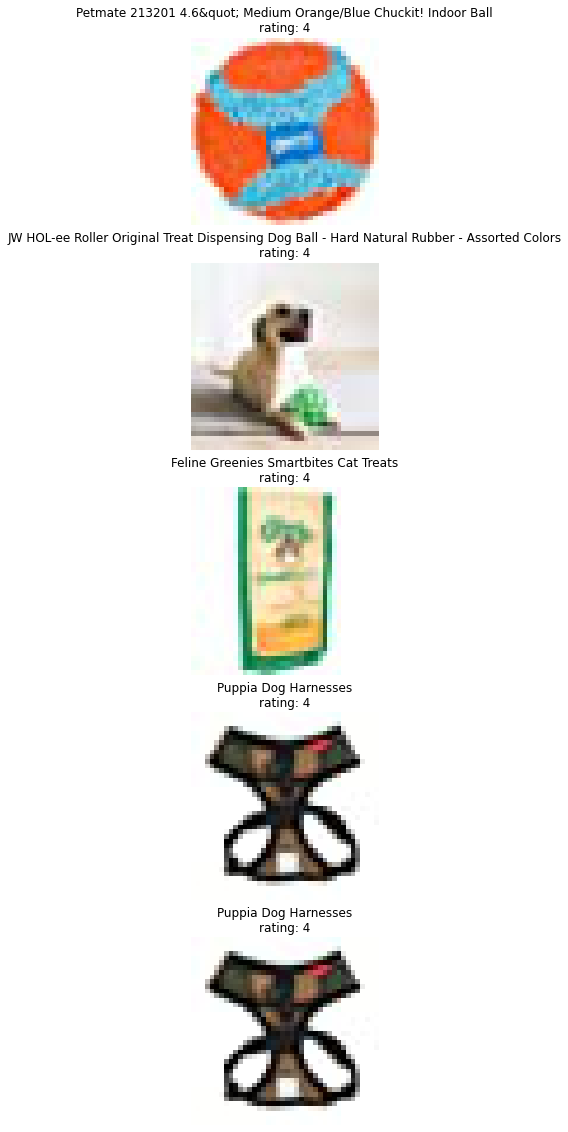

In [230]:
display(HTML('<h2>Reccomended item to user X:</h2>'))
fig2,ax2=plt.subplots(ncols=1,nrows=5,figsize=(5,20))
for i,id in enumerate(top_5_books_id):
  id = df_full[df_full.item_id ==id].index[0]
  if(df_full['image'].loc[id] != "[]"):
    link = df_full['image'].loc[id][2:-2].split("', '")[0]
    ax2[i].imshow(Image.open(urllib.request.urlopen(link)))
  ax2[i].set_title('{}\nrating: {:.0f}'.format(df_full['itemName'].loc[id],top_5_books_rating[i]))
  ax2[i].axis('off')

# Model Save

save model

In [231]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

model_file_path = 'streamlit_deploy/my_model'
model2.save(model_file_path)

INFO:tensorflow:Assets written to: streamlit_deploy/my_model\assets


INFO:tensorflow:Assets written to: streamlit_deploy/my_model\assets


save encoder

In [232]:
np.save('./streamlit_deploy/userEncoder.npy', userName_encoder.classes_)
np.save('./streamlit_deploy/itemEncoder.npy', itemName_encoder.classes_)
np.save('./streamlit_deploy/img_encoder.npy', img_encoder)



# Model Inference

load model

In [233]:
inference_model = tf.keras.models.load_model(model_file_path) #milestone2p2-branden

load label encoder

In [234]:
userName_encoder = LabelEncoder()
itemName_encoder = LabelEncoder()

userName_encoder.classes_ = np.load('./streamlit_deploy/userEncoder.npy', allow_pickle=True)
itemName_encoder.classes_ = np.load('./streamlit_deploy/itemEncoder.npy', allow_pickle=True)
img_encoder = np.load('./streamlit_deploy/img_encoder.npy', allow_pickle=True)

Append new data

In [249]:
i = 13
new_data = df_full[i:i+8].copy()
new_data = new_data.reset_index()
new_data.loc[:, "userName"] = "Branden"
# new_data.loc[:, "reviewText"] = "Nice Design"
# df_inf = new_data.copy()
# df_inf = df_inf.append(new_data)

In [250]:
print(new_data.loc[0, "userName"])

Branden


define item_df

In [251]:
item_df = pd.DataFrame(img_encoder, columns=["image", "itemName"])
item_df["item_id"] = itemName_encoder.transform(item_df.itemName)

update our label encoder manually

In [252]:
userName_encoder.classes_ = np.append(userName_encoder.classes_, new_data.loc[0, "userName"])
# itemName_encoder.classes_ = np.append(userName_encoder.classes_, new_data.loc[0, "itemName"])

preprocessing

In [253]:
user_df = pd.DataFrame(userName_encoder.classes_, columns=["userName"])

new_data["user_id"] = userName_encoder.transform(new_data.userName)
new_data["item_id"] = itemName_encoder.transform(new_data.itemName)

Recommended item to user Branden

In [260]:
num_items = 1000

user = new_data[new_data["userName"] == "Branden"].user_id[0]
item_list = item_df.item_id.sample(num_items).values
user_1 = np.array([user for i in range(len(item_list))])
text = new_data.loc[:, "reviewText"]
reviewText_user = pd.DataFrame(text for i in range(len(item_list)))[0]
# text = review_df[review_df.reviewText == new_data.loc[0, "reviewText"]].index[0]
# reviewText_user = review_df["reviewText"][np.array([text for i in range(len(item_list))])]

pred = inference_model.predict([user_1,item_list,reviewText_user]).reshape(num_items)

top_5_ids = (-pred).argsort()[:5]
top_5_books_id = item_list[top_5_ids]
top_5_books_rating = pred[top_5_ids]*(5 - 1) + 1
#top_5_books_rating = pred[top_5_ids]*(df_inf.rating.max() - df_inf.rating.min()) + df_inf.rating.min()

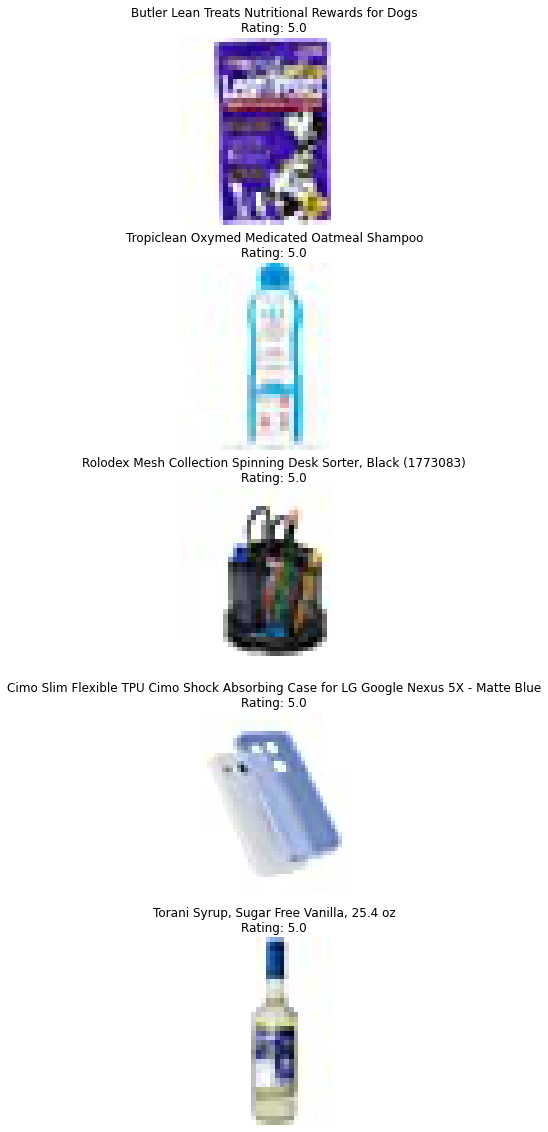

In [261]:
display(HTML('<h2>User Branden favorite item:</h2>'))

liked_books_user_1 = new_data.item_id[:5].values 
user_rating = new_data.sort_values('rating',ascending=False).rating[:5].values
fig1,ax1=plt.subplots(ncols=1,nrows=5,figsize=(5,20))
for i,id in enumerate(liked_books_user_1):
  id = df_full[df_full.item_id==id].index[0]
  if(df_full['image'].loc[id] != "[]"):
    a=Image.open(urllib.request.urlopen(df_full['image'].loc[id][2:-2].split("', '")[0]))
    ax1[i].imshow(a)
  ax1[i].set_title('{}\nRating: {}'.format(df_full['itemName'].loc[id],user_rating[i]))
  ax1[i].axis('off')

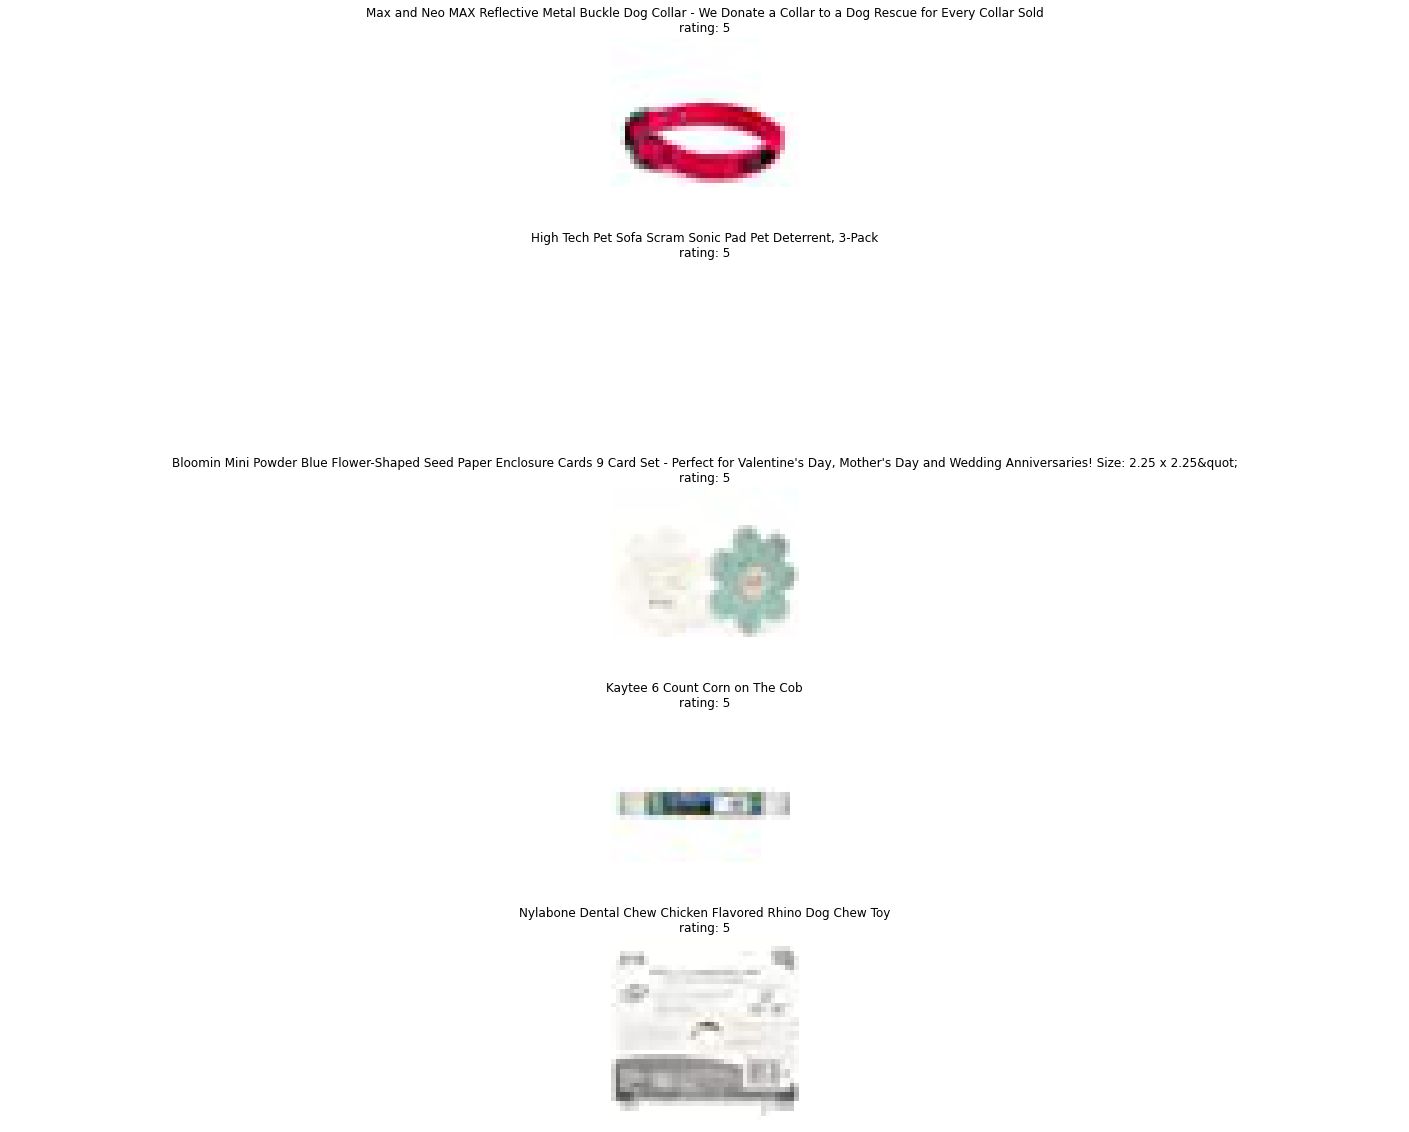

In [262]:
display(HTML('<h2>Reccomended item to user Branden:</h2>'))
fig2,ax2=plt.subplots(ncols=1,nrows=5,figsize=(25,20))
for i,id in enumerate(top_5_books_id):
  id = item_df[item_df.item_id==id].index[0]
  if(item_df['image'].loc[id] != "[]"):
    link = item_df['image'].loc[id][2:-2].split("', '")[0]
    ax2[i].imshow(Image.open(urllib.request.urlopen(link)))
  ax2[i].set_title('{}\nrating: {:.0f}'.format(item_df['itemName'].loc[id],top_5_books_rating[i]))
  ax2[i].axis('off')

# Model Evaluation

- Adding another feature like Review did help improve the model and the score
- Both model is a goodfit
- With the item and user relation recommender system model, our model can predict accurately what the user want
- if we have more information on a certain user, we can recommend more accurately what that user want to see